### 経営情報各論B Ⅰ　第11回講義参考


# pythonによる基礎的な統計分析
## 1次元データの整理
### 4.1～4.4 データを把握する（教科書P.97～108）

##  1. 準備（ライブラリのimport、データの読み込み）

In [1]:
import numpy as np
import pandas as pd

# Jupyter Notebookの出力を小数点以下3桁に抑える
%precision 3
# Dataframeの出力を小数点以下3桁に抑える
#pd.set_option('precision', 3)
pd.options.display.precision = 3  # pandas 1.4 から

In [3]:
df = pd.read_csv('ch2_scores_em.csv',
                 index_col='生徒番号')
# dfの最初の5行を表示
df.head()

,英語,数学
生徒番号,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [4]:
# 全データを表示
df

,英語,数学
生徒番号,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


## 2. 度数分布表

In [5]:
# 50人分の英語の点数のarray
english_scores = np.array(df['英語'])
# Seriesに変換してdescribeを表示
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

### 度数分布表

In [6]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [7]:
# 0~10, 10~20, ... といった文字列のリストを作成
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
# freq_classをインデックスにしてfreqでDataFrameを作成
freq_dist_df = pd.DataFrame({'度数':freq},
                            index=pd.Index(freq_class,
                                           name='階級'))
freq_dist_df

,度数
階級,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [8]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [9]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [10]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [11]:
freq_dist_df['階級値'] = class_value
freq_dist_df['相対度数'] = rel_freq
freq_dist_df['累積相対度数'] = cum_rel_freq
freq_dist_df = freq_dist_df[['階級値', '度数',
                             '相対度数', '累積相対度数']]

freq_dist_df

,階級値,度数,相対度数,累積相対度数
階級,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


#### 最頻値 （6. で説明）

In [12]:
freq_dist_df.loc[freq_dist_df['度数'].idxmax(), '階級値']

65

## 3. 統計資料のグラフ化

### ヒストグラム

In [13]:
# Matplotlibのpyplotモジュールをpltという名前でインポート
import matplotlib.pyplot as plt

# グラフがnotebook上に表示されるようにする
%matplotlib inline

plt.rcParams['font.family'] = 'MS Gothic' # 日本語対応

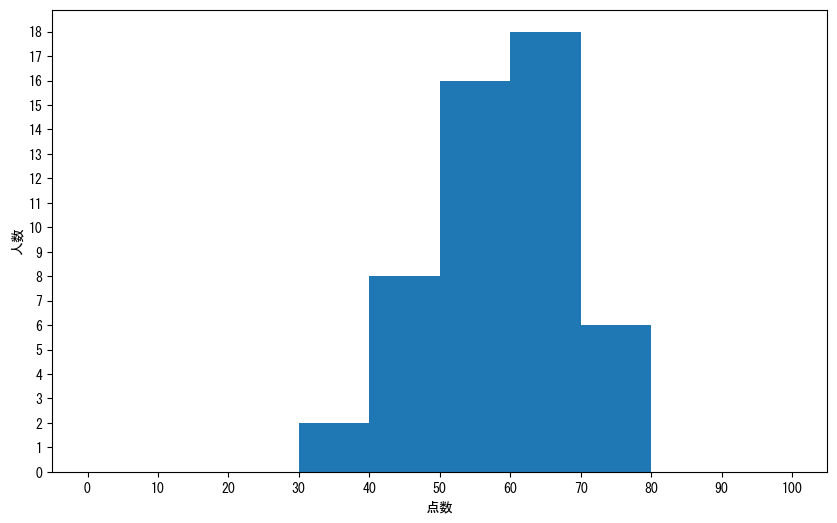

In [14]:
# キャンバスを作る
# figsizeで横・縦の大きさを指定
fig = plt.figure(figsize=(10, 6))
# キャンバス上にグラフを描画するための領域を作る
# 引数は領域を1×1個作り、1つめの領域に描画することを意味する
ax = fig.add_subplot(111)

# 階級数を10にしてヒストグラムを描画
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
# X軸にラベルをつける
ax.set_xlabel('点数')
# Y軸にラベルをつける
ax.set_ylabel('人数')
# X軸に0, 10, 20, ..., 100の目盛りをふる
ax.set_xticks(np.linspace(0, 100, 10+1))
# Y軸に0, 1, 2, ...の目盛りをふる
ax.set_yticks(np.arange(0, freq.max()+1))
# グラフの表示
plt.show()

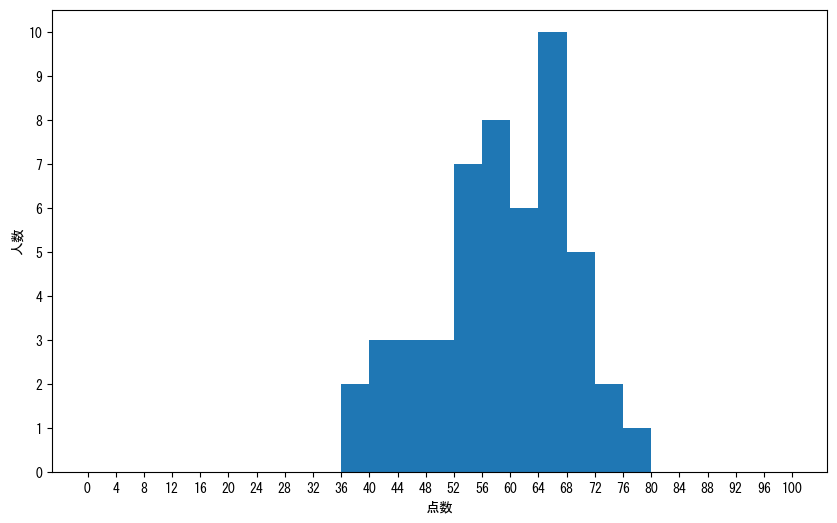

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('点数')
ax.set_ylabel('人数')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

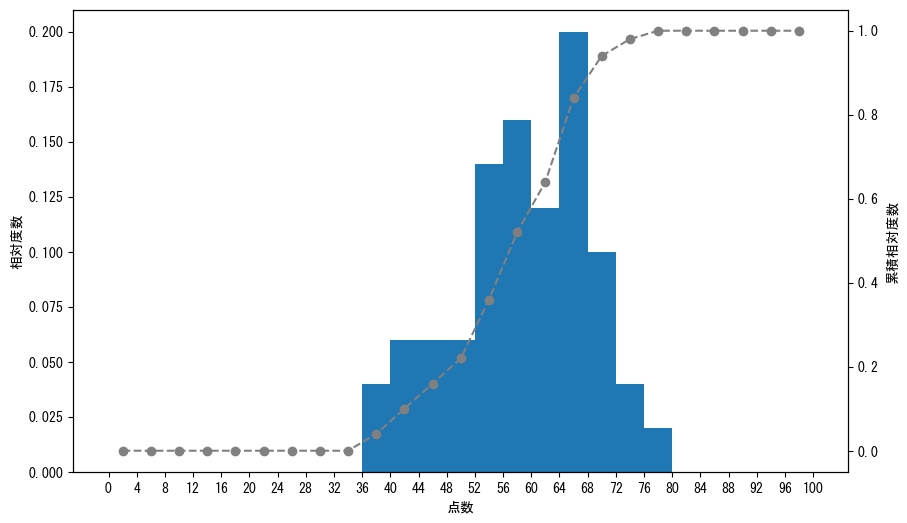

In [16]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
# Y軸のスケールが違うグラフをax1と同じ領域上に書けるようにする
ax2 = ax1.twinx()

# 相対度数のヒストグラムにするためには、度数をデータの数で割る必要がある
# これはhistの引数weightを指定することで実現できる
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
# 折れ線グラフの描画
# 引数lsを'--'にすることで線が点線に
# 引数markerを'o'にすることでデータ点を丸に
# 引数colorを'gray'にすることで灰色に
ax2.plot(class_value, cum_rel_freq,
         ls='--', marker='o', color='gray')
# 折れ線グラフの罫線を消去
ax2.grid(visible=False)

ax1.set_xlabel('点数')
ax1.set_ylabel('相対度数')
ax2.set_ylabel('累積相対度数')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

### 箱ひげ図

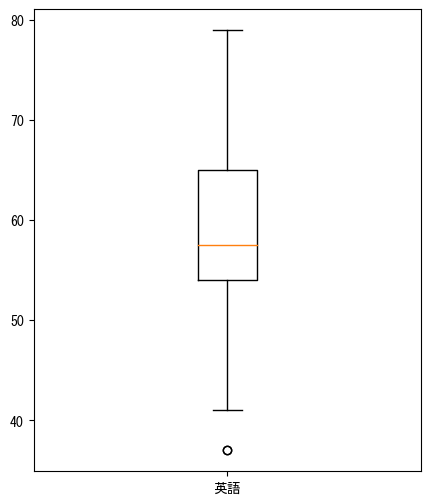

In [17]:

fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['英語'])

plt.show()

## 4. 資料を代表する値　平均値・中央値・最頻値

In [18]:
scores = np.array(df['英語'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [19]:
scores_df = pd.DataFrame({'点数':scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='生徒'))
scores_df

,点数
生徒,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### 平均値

In [20]:
sum(scores) / len(scores)

55.0

In [21]:
np.mean(scores)

55.0

In [22]:
scores_df.mean()

点数    55.0
dtype: float64

### 中央値

In [23]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [24]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]
median

56.5

In [25]:
np.median(scores)

56.5

In [26]:
scores_df.median()

点数    56.5
dtype: float64

### 最頻値

In [27]:
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

In [28]:
pd.Series([1, 2, 3, 4, 5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

## 5. データのばらつきを表す指標

### 分散と標準偏差

#### 偏差

In [29]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [30]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [31]:
np.mean(deviation)

0.0

In [32]:
np.mean(another_deviation)

0.0

In [33]:
summary_df = scores_df.copy()
summary_df['偏差'] = deviation
summary_df

,点数,偏差
生徒,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [34]:
summary_df.mean()

点数    55.0
偏差     0.0
dtype: float64

#### 分散

In [35]:
np.mean(deviation ** 2)

86.0

In [36]:
np.var(scores)

86.0

In [37]:
scores_df.var()

点数    95.556
dtype: float64

In [38]:
summary_df['偏差二乗'] = np.square(deviation)
summary_df

,点数,偏差,偏差二乗
生徒,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [39]:
summary_df.mean()

点数      55.0
偏差       0.0
偏差二乗    86.0
dtype: float64

#### 標準偏差

In [40]:
np.sqrt(np.var(scores, ddof=0))

9.273618495495704

In [41]:
np.std(scores, ddof=0)

9.273618495495704

### 散布度

#### 範囲

In [42]:
np.max(scores) - np.min(scores)

28

#### 四分位範囲

In [43]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

### データの指標のまとめ

In [44]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

## 6. 変量の標準化と偏差値

### 変量の標準化

In [45]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [46]:
np.mean(z), np.std(z, ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

### 偏差値

In [47]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)

In [48]:
scores_df['偏差値'] = z
scores_df

,点数,偏差値
生徒,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783
